<a href="https://colab.research.google.com/github/alexandrenriq/Kaggle-Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Competition: Titanic - Machine Learning from Disaster

A purpose to solve and get good results in the Kaggle competition

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')
data_train.shape 

(891, 12)

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# PassengerId is the index of the data, so for that we'll set it as index
data_train = data_train.set_index('PassengerId')

In [5]:
data_test = pd.read_csv('test.csv')
data_test.shape

(418, 11)

In [6]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

## Descriptive Analysis

Examine the dataset through the frequency of not-null values, null values and unique values 

In [7]:
data_dict = pd.DataFrame(data_train.dtypes)
data_dict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [8]:
# Count all the missing values by column
data_dict['MissingVal'] = data_train.isnull().sum()
data_dict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [9]:
# Now we'll see the unique values by column
data_dict['NUnique'] = data_train.nunique()
data_dict

,0,MissingVal,NUnique
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [10]:
# Get not-null values by column
data_dict['Count'] = data_train.count()
data_dict

,0,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [11]:
# Finally, we'll rename the first column
data_dict = data_dict.rename(columns={0: 'DataType'})
data_dict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


We just reviewed how the frequency of the data is, so now, we'll describe statistically a group of columns by their datatype

In [12]:
# First object datatype
data_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nasser, Mrs. Nicholas (Adele Achem)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [13]:
# Number datatype (include: float, float64, int, int64)
data_train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Descriptive Analysis with Graphs and Plots

We'll just check how distributed are the results for our predictor variable Survived

In [14]:
data_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

It is possible to observ that only 38.38% of the passengers were survived.

### Univariate Analysis

We'll only graph the numerical columns for the purpose

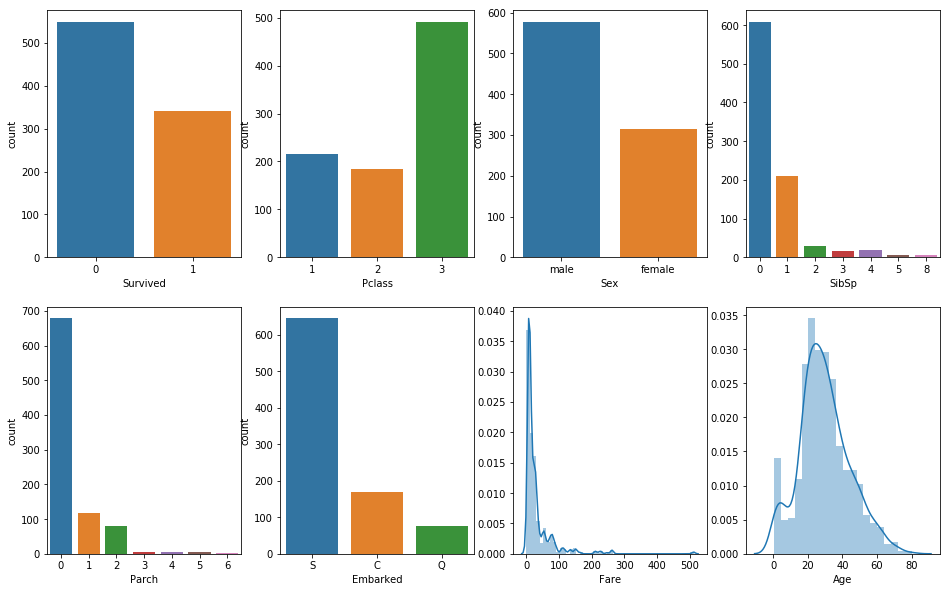

In [15]:
# How we only have 8 numerical columns, we use 2 - 4
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

# TODO: graph numerical columns automatically with a loop
sns.countplot('Survived', data=data_train, ax=axes[0, 0])
sns.countplot('Pclass', data=data_train, ax=axes[0, 1])
sns.countplot('Sex', data=data_train, ax=axes[0, 2])
sns.countplot('SibSp', data=data_train, ax=axes[0, 3])
sns.countplot('Parch', data=data_train, ax=axes[1, 0])
sns.countplot('Embarked', data=data_train, ax=axes[1, 1])
sns.distplot(data_train['Fare'], kde=True, ax=axes[1, 2])
sns.distplot(data_train['Age'].dropna(), kde=True, ax=axes[1, 3])


### Bivariate Analysis

Again, we'll only work with numerica columns for the purpose

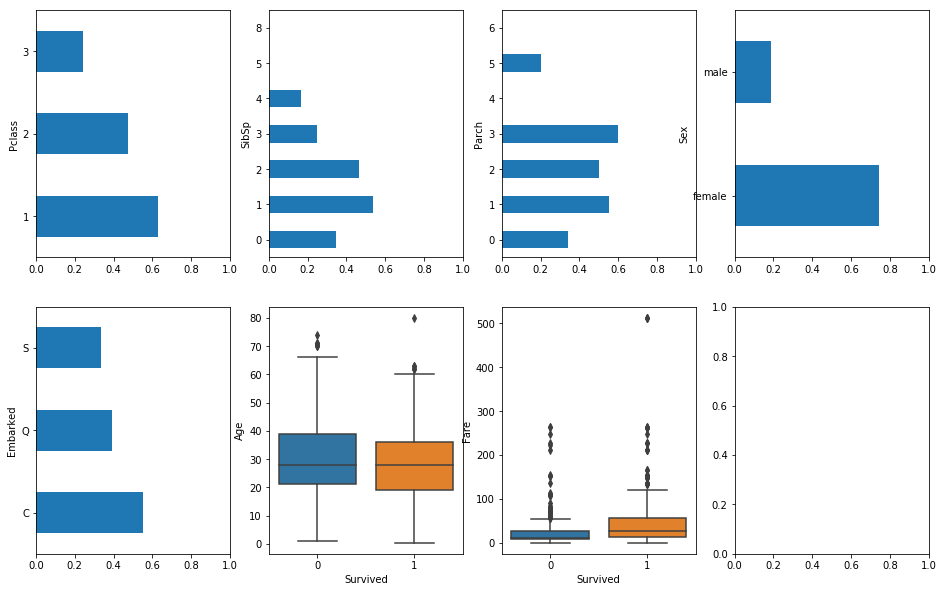

In [16]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data_train.groupby('Pclass')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 0], xlim=[0, 1])
data_train.groupby('SibSp')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 1], xlim=[0, 1])
data_train.groupby('Parch')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 2], xlim=[0, 1])
data_train.groupby('Sex')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 3], xlim=[0, 1])
data_train.groupby('Embarked')['Survived'].mean().plot(kind='barh', ax=axesbi[1, 0], xlim=[0, 1])
sns.boxplot(x="Survived", y="Age", data=data_train, ax=axesbi[1, 1])
sns.boxplot(x="Survived", y="Fare", data=data_train, ax=axesbi[1, 2])

### Merge Plot (Continous vs Continous)


There is only two continous or floating columns in the data, Age and Fare

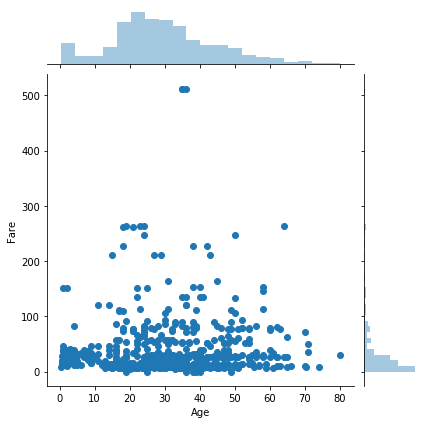

In [17]:
sns.jointplot(x="Age", y="Fare", data=data_train)

### Multivariate Analysis

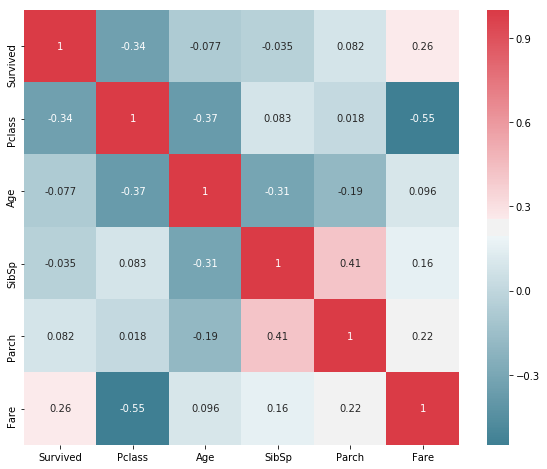

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True, square=True, ax=ax)

# Data Transformation

## Feature Engineering

   Adding new features to the dataset

In [0]:
data_train['Name_len'] = data_train['Name'].str.len()

In [0]:
data_train['Ticket_First'] = data_train['Ticket'].str[0]

In [0]:
# Number of parents, siblings and spouses
data_train['FamilyCount'] = data_train['SibSp'] + data_train['Parch']

In [0]:
data_train['Cabin_first'] = data_train['Cabin'].str[0]

In [23]:
# Regular expression to get the title of the Name
data_train['Title'] = data_train['Name'].str.extract('\, ([A-Z][^ ]*\.)', expand=False)
data_train['Title'].value_counts().reset_index()

,index,Title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Col.,2
7,Mlle.,2
8,Major.,2
9,Mme.,1


## Preprocessing

In [0]:
data_train = data_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [0]:
data_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [0]:
def categorical_label_encoding(data_train, attribute_name):
    data_train[attribute_name] = pd.Categorical(data_train[attribute_name])
    data_train[attribute_name] = data_train[attribute_name].cat.codes

In [0]:
categorical_label_encoding(data_train, 'Sex')

In [0]:
categorical_label_encoding(data_train, 'Embarked')

In [0]:
cols = data_train.columns.values[1:]
pred = data_train.columns.values[0]
cols_correlated = []
for attr in cols:
    correlation = data_train[attr].corr(data_train[pred], method='pearson')
    print(attr + ":")
    print("\t", correlation)
    if abs(correlation) > 0.15:
        cols_correlated.append(attr)

Pclass:
	 -0.33848103596101475
Sex:
	 -0.5433513806577555
Age:
	 -0.07722109457217768
SibSp:
	 -0.035322498885735645
Parch:
	 0.08162940708348372
Fare:
	 0.2573065223849625
Embarked:
	 -0.1765092251688822


In [0]:
cols_correlated.append('Survived')

In [0]:
data_train = data_train[cols_correlated]

In [0]:
data_train['Survived'].isnull().sum()

0

In [0]:
from sklearn.preprocessing import StandardScaler
def scaling_x(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [0]:
X = data_train.iloc[:, :-1]
y = data_train.iloc[:, -1]

In [0]:
X = scaling_x(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [0]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((757, 4), (134, 4), (757,), (134,))

In [0]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=3,
                     weights='uniform')

In [0]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8059701492537313

## Final csv

In [0]:
data_test = data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [0]:
categorical_label_encoding(data_test, 'Sex')

In [0]:
categorical_label_encoding(data_test, 'Embarked')

In [0]:
data_test = data_test[['Pclass', 'Sex', 'Fare', 'Embarked']]

In [0]:
data_test['Fare'] = data_test['Fare'].fillna(11.5)

In [0]:
data_test.isnull().sum().sum()

0

In [0]:
X_final_test = data_test.iloc[:, :]

In [0]:
X_final_test = scaling_x(X_final_test)

In [0]:
pred_final = model.predict(X_final_test)

In [0]:
out = pd.DataFrame([], columns=['PassengerId', 'Survived'])
for i, row in data_test.iterrows():
    out = out.append(pd.DataFrame({'PassengerId': [row['PassengerId']], 'Survived': [pred_final[i]]}))

In [0]:
out.to_csv('out.csv', index=False)